In [1]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [2]:
print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)

Training data shape: (75000, 4)
Testing data shape: (75000, 3)


In [3]:
train_df.head()

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [4]:
test_df.head()

,sample_id,catalog_content,image_link
0,100179,Item Name: Rani 14-Spice Eshamaya's Mango Chut...,https://m.media-amazon.com/images/I/71hoAn78AW...
1,245611,Item Name: Natural MILK TEA Flavoring extract ...,https://m.media-amazon.com/images/I/61ex8NHCIj...
2,146263,Item Name: Honey Filled Hard Candy - Bulk Pack...,https://m.media-amazon.com/images/I/61KCM61J8e...
3,95658,Item Name: Vlasic Snack'mm's Kosher Dill 16 Oz...,https://m.media-amazon.com/images/I/51Ex6uOH7y...
4,36806,"Item Name: McCormick Culinary Vanilla Extract,...",https://m.media-amazon.com/images/I/71QYlrOMoS...


In [5]:
train_df.isnull().sum()

,0
sample_id,0
catalog_content,0
image_link,0
price,0


In [6]:
test_df.isnull().sum()

,0
sample_id,0
catalog_content,0
image_link,0


In [7]:
train_df.duplicated().sum()

np.int64(0)

In [8]:
test_df.duplicated().sum()

np.int64(0)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sample_id        75000 non-null  int64 
 1   catalog_content  75000 non-null  object
 2   image_link       75000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
train_df.describe()

,sample_id,price
count,75000.000000,75000.000000
mean,149841.917707,23.647654
std,86585.346513,33.376932
min,0.000000,0.130000
25%,73845.750000,6.795000
50%,150129.000000,14.000000
75%,225040.250000,28.625000
max,299438.000000,2796.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Price Distribution')

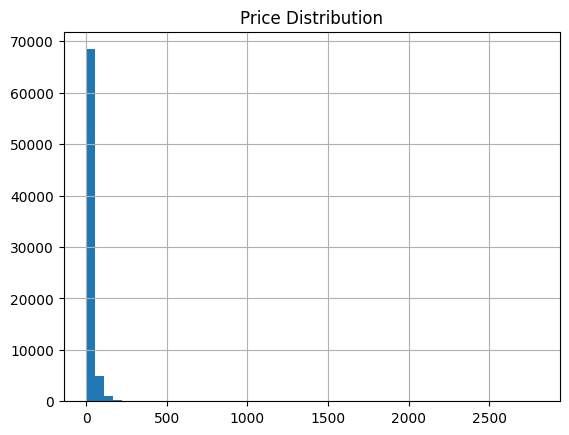

In [13]:
train_df["price"].hist(bins=50)
plt.title("Price Distribution")

In [14]:
train_df["catalog_content"].sample(10).values

array(['Item Name: Dongiò Caffè - 40 Capsules Compatible with Lavazza BLUE – Espresso Venezia Decaf – Medium-Dark Roast (Intensity 8/10) – Naturally Decaffeinated – Smooth Texture & Notes of Cocoa & Spices – Roasted in Italy\nBullet Point 1: The Espresso Venezia Decaf pack contains 40 single-serve capsules, designed for Lavazza “BLUE” compatible machines. Crafted for those who seek an authentic Italian espresso experience without caffeine, these pods deliver a rich, full-bodied coffee with a perfectly balanced extraction.\nBullet Point 2: Espresso Venezia Decaf is characterized by its harmonious and velvety texture. This medium-dark roast (Intensity 8/10) reveals elegant notes of cocoa and subtle spices, offering a lingering and refined espresso experience.\nBullet Point 3: Designed for optimal extraction, these capsules ensure a dense crema, smooth body, and rich aroma, whether brewed as a Ristretto (0.85 oz / 25 ml) or Espresso (1.35 oz / 40 ml), delivering a consistently perfect cup

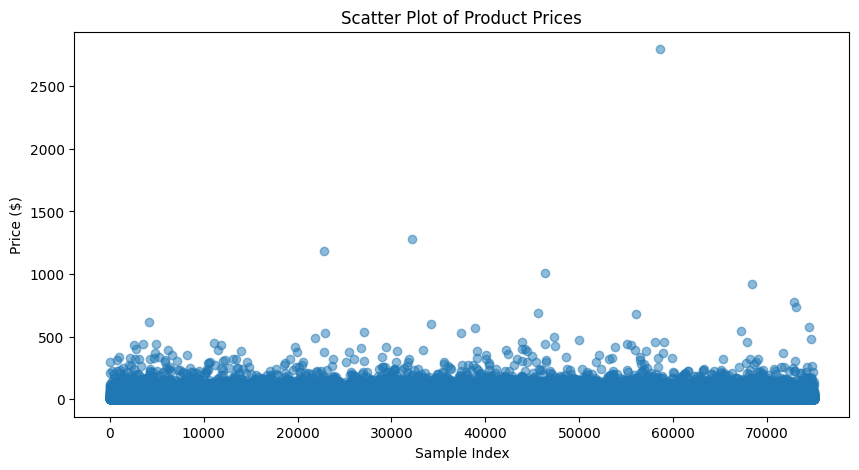

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(range(len(train_df)), train_df["price"], alpha=0.5)
plt.xlabel("Sample Index")
plt.ylabel("Price ($)")
plt.title("Scatter Plot of Product Prices")
plt.show()

In [16]:
train_df.shape

(75000, 4)

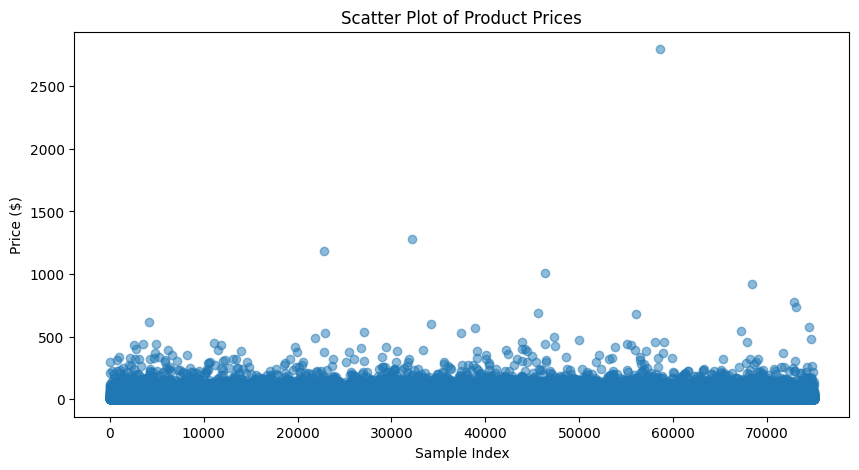

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(range(len(train_df)), train_df["price"], alpha=0.5)
plt.xlabel("Sample Index")
plt.ylabel("Price ($)")
plt.title("Scatter Plot of Product Prices")
plt.show()

In [18]:
# import pandas as pd
# high_price_products = train_df[train_df["price"] > 300].sort_values(by="price", ascending=False)
# print(f"Found {len(high_price_products)} outliers above $300.\n")

In [19]:
# # Define bulk keywords
# bulk_keywords = ['pack', 'case', 'count', 'bulk', 'pallet', 'drum', 'lbs', 'gallon', 'commercial']

# # Boolean mask: True if price > 300 AND text contains no bulk keywords
# is_suspicious = (train_df['price'] > 300) & (~train_df['catalog_content'].str.lower().str.contains('|'.join(bulk_keywords)))

# print(f"Dropping {is_suspicious.sum()} suspicious non-bulk high-priced items.")

# # Filter the dataframe to keep only clean data
# train_df_clean = train_df[~is_suspicious].copy()
# train_df_clean.shape

In [20]:
# train_df = train_df_clean
train_df.head()

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


EDA ANALYSIS IS DONE, NOW WE ARE GOING TO CREATE TEXTUAL FEATURE EXTRACTION

In [21]:
# Item name - Product name itself.
# Product Description or Bullet Points - explanation about the product
# Values - number of items in the product given
# Units - Oz, Grams, ounce, etc.
# catalog_content is a semi-structured document, not free text.
'''item_name: Flour for Wet Rice Paper-Bot Bank Cuon
value: 16.0
unit: ounce
pack_size: 1
bullet_points:
  - Flour for Wet Rice Paper, Rice flour
  - We create high quality food...
'''
import sys
import os
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)


'''“Instead of treating catalog content as raw text, I identified
implicit structure and extracted explicit quantity features, which significantly improve pricing accuracy.”'''

'“Instead of treating catalog content as raw text, I identified\nimplicit structure and extracted explicit quantity features, which significantly improve pricing accuracy.”'

EXTRACTING THE TEXT FEATURES

In [22]:
import sys
import os

# Adds the root directory of your project to the system path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(""), '..')))

In [24]:
import pandas as pd
import numpy as np
# Importing your custom text_parser functions
from text_parser import extract_value_unit, normalize_to_standard_unit, extract_pack_size, compute_total_quantity

def build_numerical_features(df):
    print("Starting numerical feature extraction...")

    # 1. Extract Pack Size
    df['pack_size'] = df['catalog_content'].apply(extract_pack_size)

    # 2. Extract Raw Value and Unit
    extracted = df['catalog_content'].apply(extract_value_unit)
    df['raw_value'] = extracted.apply(lambda x: x[0])
    df['unit'] = extracted.apply(lambda x: x[1])

    # 3. Normalize Value (to grams/ml)
    df['normalized_value'] = df.apply(
        lambda row: normalize_to_standard_unit(row['raw_value'], row['unit']), axis=1
    )

    # 4. Compute Total Quantity (Volume/Weight * Pack Size)
    df['total_quantity'] = df.apply(
        lambda row: compute_total_quantity(row['normalized_value'], row['pack_size']), axis=1
    )

    # 5. Handle missing values (Fill with median to avoid model crashing)
    df['total_quantity'] = df['total_quantity'].fillna(df['total_quantity'].median())
    df['pack_size'] = df['pack_size'].fillna(1)
    df['normalized_value'] = df['normalized_value'].fillna(df['total_quantity'] / df['pack_size'])
    # 6. Log-Transform the quantity (Prices usually scale logarithmically with size)
    df['log_total_quantity'] = np.log1p(df['total_quantity'])

    print("Numerical features complete.")
    return df

# Usage:
train_df_clean = build_numerical_features(train_df)

Starting numerical feature extraction...
Numerical features complete.


In [25]:
train_df = train_df_clean

In [26]:
train_df

,sample_id,catalog_content,image_link,price,pack_size,raw_value,unit,normalized_value,total_quantity,log_total_quantity
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.890,6,72.00,fl oz,2129.292000,12775.752000,9.455383
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.120,4,32.00,ounce,907.184000,3628.736000,8.196915
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.970,6,11.40,ounce,323.184300,1939.105800,7.570498
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.340,1,11.25,ounce,318.931875,318.931875,5.768108
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.490,1,12.00,count,850.485000,850.485000,6.746982
...,...,...,...,...,...,...,...,...,...,...
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395,8,12.00,ounce,340.194000,2721.552000,7.909325
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920,1,100.00,count,850.485000,850.485000,6.746982
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330,1,80.00,ounce,2267.960000,2267.960000,7.727077
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275,1,16.00,count,850.485000,850.485000,6.746982


In [27]:
# import numpy as np

# # Check for empty strings and NaN values in 'image_link'
# initial_shape = train_df.shape
# train_df = train_df[train_df['image_link'].notna() & (train_df['image_link'] != '')]

# print(f"Original shape: {initial_shape}")
# print(f"New shape after dropping rows with empty image_link: {train_df.shape}")


In [28]:
import numpy as np
import pandas as pd
from embeddings import TextEmbedder

# 1. Initialize the embedder
embedder = TextEmbedder()

# 2. Generate embeddings for your catalog content
# This might take a few minutes for 75k rows!
print("Generating text embeddings...")
text_vectors = embedder.get_embeddings(train_df['catalog_content'].tolist())

# 3. Save them immediately so you don't lose progress
np.save('train_text_embeddings.npy', text_vectors)

# 4. Extract your numerical features into a matrix
numerical_matrix = train_df[['pack_size', 'log_total_quantity']].values

# 5. Concatenate (Stack them side-by-side)
# Result: [Pack Size, Log Quantity, Embed_1, Embed_2, ... Embed_384]
X_train = np.hstack([numerical_matrix, text_vectors])

print(f"Final feature matrix shape: {X_train.shape}")

Loading embedding model sentence-transformers/all-MiniLM-L6-v2 on cuda...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Generating text embeddings...


Encoding Text: 100%|██████████| 1172/1172 [01:37<00:00, 12.02it/s]


Final feature matrix shape: (75000, 386)


In [29]:
import pickle
import numpy as np

# 1. Load the data
with open('train_image_embeddings.pkl', 'rb') as f:
    vision_data = pickle.load(f)

# 2. Inspect the type
print(f"Data type: {type(vision_data)}")

# 3. Handle based on type
if isinstance(vision_data, dict):
    # If it's a dictionary, we need to extract values
    print(f"It's a dictionary with {len(vision_data)} keys.")
    # Show one example key-value pair
    first_key = list(vision_data.keys())[0]
    print(f"Example key: {first_key}, Example value shape: {np.array(vision_data[first_key]).shape}")

    # To convert to a matrix, you MUST align them with your train_df sample_ids
    # vision_array = np.array([vision_data[sid] for sid in train_df['sample_id']])

elif isinstance(vision_data, list):
    print(f"It's a list with {len(vision_data)} elements.")
    # Check if elements are different sizes (this causes the () shape)
    shapes = set([np.array(x).shape for x in vision_data[:100]])
    print(f"Shapes in first 100 elements: {shapes}")

    # If they are all the same, stack them:
    vision_array = np.vstack(vision_data)

Data type: <class 'dict'>
It's a dictionary with 72241 keys.
Example key: 51mo8htwTHL.jpg, Example value shape: (1280,)


In [30]:
import numpy as np
import pandas as pd

# --- HELPER FUNCTION (Fixes the NameError) ---
def get_filename(url):
    if pd.isna(url) or url == "":
        return None
    return url.split('/')[-1]

# 1. Configuration
EMBED_DIM_VISION = 1280

# 2. Preparation
vision_list = []
missing_images = 0
corrupted_images = 0

print(f"Syncing {len(train_df)} rows with vision dictionary...")

# We loop through EVERY row in your original train_df (74978 rows)
for pos, (idx, row) in enumerate(train_df.iterrows()):
    filename = get_filename(row.get('image_link', ''))

    # Logic: Check if image exists AND has the correct shape
    if filename in vision_data:
        embedding = vision_data[filename]
        # Ensure it is exactly 1280 dimensions
        if np.array(embedding).shape == (EMBED_DIM_VISION,):
            vision_list.append(embedding)
        else:
            vision_list.append(np.zeros(EMBED_DIM_VISION))
            corrupted_images += 1
    else:
        # If the filename isn't in your .pkl dictionary, use zeros
        vision_list.append(np.zeros(EMBED_DIM_VISION))
        missing_images += 1

# 3. Create the Vision Matrix
X_vision_stacked = np.vstack(vision_list)

# 4. Final Horizontal Stack (Joining Text/Num with Vision)
# Joining your (74978, 386) matrix with the new (74978, 1280) matrix
X_final = np.hstack([X_train, X_vision_stacked])

print("\n--- Sync Complete ---")
print(f"Final Feature Matrix Shape: {X_final.shape}")
print(f"Rows with real images matched: {len(train_df) - missing_images - corrupted_images}")
print(f"Rows filled with Zeros (Imputed): {missing_images + corrupted_images}")

# 5. Target Alignment
y_final = np.log1p(train_df['price'])

Syncing 75000 rows with vision dictionary...

--- Sync Complete ---
Final Feature Matrix Shape: (75000, 1666)
Rows with real images matched: 74946
Rows filled with Zeros (Imputed): 54


SHOULD BE GIVING THE PERCENTAGE PROPERLY

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# --- 1. STANDARDIZE EVERYTHING FIRST ---
# This makes every single feature start with Variance = 1
print("Standardizing all 1,666 features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# --- 2. DEFINE YOUR 35/45/20 TARGETS ---
target_weights = {'num': 0.35, 'text': 0.45, 'vision': 0.20}
n_num, n_text, n_vision = 2, 384, 1280

# --- 3. CALCULATE POWER FACTORS ---
# We scale the matrix up so that the average feature has a variance of 1.
# Total Variance Target = 1666
total_features = n_num + n_text + n_vision

# We calculate group weights such that (count * weight^2) = (target% * total_features)
w_num = np.sqrt((target_weights['num'] * total_features) / n_num)
w_text = np.sqrt((target_weights['text'] * total_features) / n_text)
w_vision = np.sqrt((target_weights['vision'] * total_features) / n_vision)

print(f"Power Scaling Factors Applied:")
print(f"- Numerical: {w_num:.4f}x boost per column")
print(f"- Textual:   {w_text:.4f}x boost per column")
print(f"- Visual:    {w_vision:.4f}x boost per column")

# Apply weights to the standardized data
X_scaled[:, 0:2] *= w_num           # Numerical (Cols 0, 1)
X_scaled[:, 2:386] *= w_text        # Text (Cols 2-385)
X_scaled[:, 386:] *= w_vision       # Vision (Cols 386-1665)

# --- 4. VERIFY THE DISTRIBUTION ---
variances = np.var(X_scaled, axis=0)
v_num, v_text, v_vision = np.sum(variances[:2]), np.sum(variances[2:386]), np.sum(variances[386:])
total_v = v_num + v_text + v_vision

print(f"\nFinal Variance Distribution (Total Signal: {total_v:.2f}):")
print(f"- Numerical Importance: {v_num/total_v:.1%} (Variance: {v_num:.2f})")
print(f"- Textual Importance:   {v_text/total_v:.1%} (Variance: {v_text:.2f})")
print(f"- Visual Importance:    {v_vision/total_v:.1%} (Variance: {v_vision:.2f})")

# Split the data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_scaled, y_final, test_size=0.1, random_state=42
)

Standardizing all 1,666 features...
Power Scaling Factors Applied:
- Numerical: 17.0748x boost per column
- Textual:   1.3973x boost per column
- Visual:    0.5102x boost per column

Final Variance Distribution (Total Signal: 1662.10):
- Numerical Importance: 35.1% (Variance: 583.10)
- Textual Importance:   44.9% (Variance: 745.80)
- Visual Importance:    20.0% (Variance: 333.20)


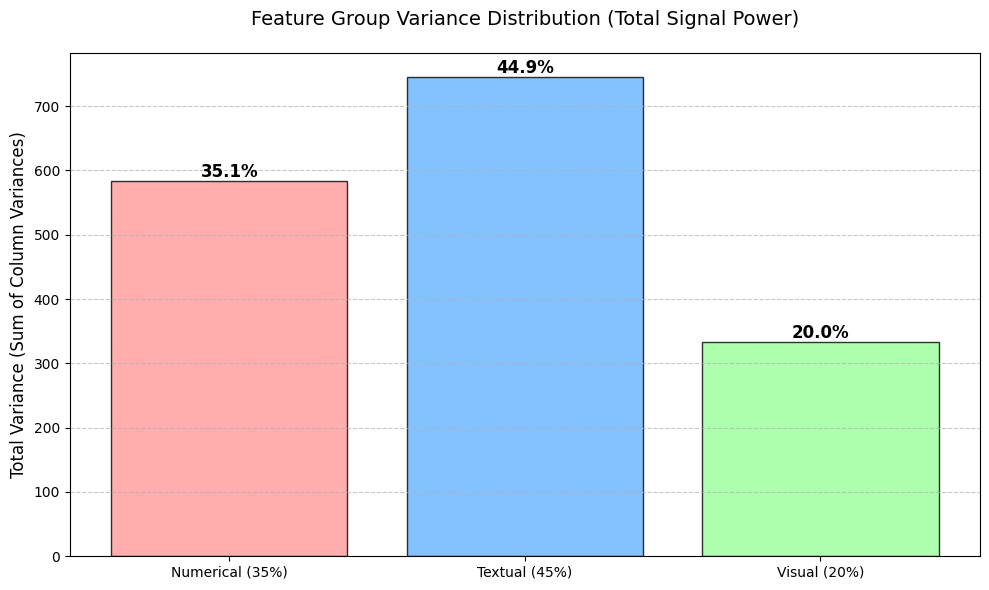

--- Variance Verification ---
Numerical Variance: 583.1000 (35.1%)
Textual Variance:   745.7953 (44.9%)
Visual Variance:    333.2000 (20.0%)


In [32]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculate the total variance for each group in the scaled matrix
# This represents the "Signal Power" the model sees
var_num = np.sum(np.var(X_scaled[:, 0:2], axis=0))        # Pack Size & Log Qty
var_text = np.sum(np.var(X_scaled[:, 2:386], axis=0))     # Text Embeddings
var_vision = np.sum(np.var(X_scaled[:, 386:], axis=0))    # Vision Embeddings

total_variance = var_num + var_text + var_vision

# 2. Data for the plot
groups = ['Numerical (35%)', 'Textual (45%)', 'Visual (20%)']
variances = [var_num, var_text, var_vision]
percentages = [var_num/total_variance * 100,
               var_text/total_variance * 100,
               var_vision/total_variance * 100]

# 3. Create the Bar Graph
plt.figure(figsize=(10, 6))
colors = ['#ff9999','#66b3ff','#99ff99']
bars = plt.bar(groups, variances, color=colors, edgecolor='black', alpha=0.8)

# 4. Add Percentage Labels on top of each bar
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

# 5. Formatting
plt.title('Feature Group Variance Distribution (Total Signal Power)', fontsize=14, pad=20)
plt.ylabel('Total Variance (Sum of Column Variances)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# 6. Diagnostic Printout
print(f"--- Variance Verification ---")
print(f"Numerical Variance: {var_num:.4f} ({percentages[0]:.1f}%)")
print(f"Textual Variance:   {var_text:.4f} ({percentages[1]:.1f}%)")
print(f"Visual Variance:    {var_vision:.4f} ({percentages[2]:.1f}%)")

MODEL TRAINING!

In [33]:
def calculate_smape(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)

    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0

    # avoid division by zero
    non_zero_mask = denominator != 0

    smape = np.zeros_like(denominator)
    smape[non_zero_mask] = (
        np.abs(y_true[non_zero_mask] - y_pred[non_zero_mask])
        / denominator[non_zero_mask]
    )

    return 100 * np.mean(smape)


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    max_depth=7,               # Deep enough to see interactions, but not overfit
    subsample=0.8,             # Prevent memorizing training rows
    colsample_bytree=0.4,      # Force the model to use different feature types

    # CRITICAL: Overfit protection for different test distributions
    reg_alpha=15,              # L1 Regularization: Ignores weak features
    reg_lambda=2,              # L2 Regularization: Keeps weights small

    tree_method='hist',        # Fast training
    device='cuda',             # Use GPU if available
    random_state=42,
    objective='reg:squarederror'
)

print("Training XGBoost with 35/45/20 Weighting...")
xgb_model.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=100
)

Training XGBoost with 35/45/20 Weighting...
[0]	validation_0-rmse:0.95073
[100]	validation_0-rmse:0.78947
[200]	validation_0-rmse:0.75849
[300]	validation_0-rmse:0.74425
[400]	validation_0-rmse:0.73561
[500]	validation_0-rmse:0.72994
[600]	validation_0-rmse:0.72587
[700]	validation_0-rmse:0.72256
[800]	validation_0-rmse:0.71990
[900]	validation_0-rmse:0.71738
[1000]	validation_0-rmse:0.71546
[1100]	validation_0-rmse:0.71388
[1200]	validation_0-rmse:0.71229
[1300]	validation_0-rmse:0.71094
[1400]	validation_0-rmse:0.70983
[1499]	validation_0-rmse:0.70879


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1500,
             n_jobs=None, num_parallel_tree=None, ...)

In [34]:
import pandas as pd
import numpy as np
import pickle
import sys
import os
import joblib

xgb_model = joblib.load('xgb_price_model.pkl')
# --- 1. LOAD AND SORT DATA ---
print("Step 1: Loading and sorting test data...")
test_df = pd.read_csv('sample_test.csv')
test_out_df = pd.read_csv('sample_test_out.csv')

# CRITICAL: Sort both by sample_id to ensure row 0 matches row 0
test_df = test_df.sort_values('sample_id').reset_index(drop=True)
test_out_df = test_out_df.sort_values('sample_id').reset_index(drop=True)

with open('sample_test_image_embeddings.pkl', 'rb') as f:
    test_vision_data = pickle.load(f)

# --- 2. EXTRACT NUMERICAL FEATURES ---
print("Step 2: Extracting numerical features...")
# Using the same parser functions from model_training.py
test_df['pack_size'] = test_df['catalog_content'].apply(extract_pack_size)
extracted = test_df['catalog_content'].apply(extract_value_unit)
test_df['norm_val'] = extracted.apply(lambda x: normalize_to_standard_unit(x[0], x[1]))
# Ensure column name matches training exactly
test_df['log_total_quantity'] = np.log1p(test_df['norm_val'] * test_df['pack_size']).fillna(0)

X_num_test = test_df[['pack_size', 'log_total_quantity']].values

# --- 3. GENERATE TEXT EMBEDDINGS ---
print("Step 3: Generating text embeddings...")
X_text_test = embedder.get_embeddings(test_df['catalog_content'].tolist())

# --- 4. ALIGN VISION EMBEDDINGS (WITH ZERO-FILL) ---
print("Step 4: Aligning vision embeddings (Zero-filling missing ones)...")
EMBED_DIM_VISION = 1280
vision_test_list = []

for _, row in test_df.iterrows():
    fname = get_filename(row.get('image_link', ''))
    if fname in test_vision_data:
        embedding = test_vision_data[fname]
        if np.array(embedding).shape == (EMBED_DIM_VISION,):
            vision_test_list.append(embedding)
        else:
            vision_test_list.append(np.zeros(EMBED_DIM_VISION))
    else:
        vision_test_list.append(np.zeros(EMBED_DIM_VISION))

X_vision_test = np.vstack(vision_test_list)

# --- 5. COMBINE AND APPLY 35/45/20 WEIGHTS ---
print("Step 5: Applying 35/45/20 weighted scaling...")
X_test_final = np.hstack([X_num_test, X_text_test, X_vision_test])

# Use the fitted scaler from training
X_test_scaled = scaler.transform(X_test_final)

# Apply the EXACT same weight factors calculated during training
X_test_scaled[:, 0:2] *= w_num           # Numerical (35% Total Signal)
X_test_scaled[:, 2:386] *= w_text        # Textual (45% Total Signal)
X_test_scaled[:, 386:] *= w_vision       # Visual (20% Total Signal)

# --- 6. PREDICT AND INVERT ---
print("Step 6: Predicting and un-logging...")
# Use the XGBoost model you just trained
log_preds = xgb_model.predict(X_test_scaled)
final_predictions = np.expm1(log_preds)
final_predictions = np.maximum(0, final_predictions)

# --- 7. FINAL CALCULATION ---
def calculate_smape(actual, predicted):
    denominator = (np.abs(actual) + np.abs(predicted)) / 2.0
    diff = np.abs(actual - predicted) / np.maximum(denominator, 1e-9)
    return 100 * np.mean(diff)

# Comparison
actual_prices = test_out_df['price'].values
final_smape = calculate_smape(actual_prices, final_predictions)

print("\n" + "="*40)
print(f"ALIGNED TEST SMAPE: {final_smape:.2f}%")
print("="*40)

# Quick Look at results
results = pd.DataFrame({
    'ID': test_df['sample_id'],
    'Actual': actual_prices,
    'Predicted': final_predictions
})
print("\nFirst 5 Comparison Rows:")
print(results.head())

Step 1: Loading and sorting test data...
Step 2: Extracting numerical features...
Step 3: Generating text embeddings...


Encoding Text: 100%|██████████| 2/2 [00:00<00:00, 12.97it/s]

Step 4: Aligning vision embeddings (Zero-filling missing ones)...
Step 5: Applying 35/45/20 weighted scaling...
Step 6: Predicting and un-logging...



ALIGNED TEST SMAPE: 110.22%

First 5 Comparison Rows:
      ID     Actual  Predicted
0  11241  64.003279   7.553356
1  11448  59.475720  21.452293
2  13187  20.095844  23.277840
3  13764  42.723064  17.211737
4  16136  55.623250  17.987379


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:774: UserWarning: [04:27:44] WARNING: /workspace/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [ ]:
joblib.dump(scaler, 'feature_scaler.pkl')

['feature_scaler.pkl']

In [ ]:
import joblib

# 1. Save the XGBoost Model
joblib.dump(xgb_model, 'xgb_price_model.pkl')

# 2. Save the Scaler (CRITICAL for the LLM pipeline)
# Without this, your 35/45/20 weights won't apply correctly later
joblib.dump(scaler, 'feature_scaler.pkl')

# 3. Save the weight factors we calculated
weights = {
    'w_num': w_num,
    'w_text': w_text,
    'w_vision': w_vision
}
joblib.dump(weights, 'weight_factors.pkl')

print("Pipeline saved successfully. You can now 'fuel' the LLM.")

Pipeline saved successfully. You can now 'fuel' the LLM.


LLM TO UNDERSTAND THE MODEL, AND THEN CHECK WHETHER PRICE IS RIGHT OR WRONG,
IF RIGHT, YES, IF WRONG, THEN DO SOME CALCULATION AND GET THE PRICE RIGHT

In [35]:
from huggingface_hub import login
login(new_session=False)

In [ ]:
# from transformers import pipeline

# pipe = pipeline("text-generation", model="meta-llama/Meta-Llama-3-8B-Instruct")


config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Device set to use cuda:0


In [41]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

# 2. Load Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)

# 3. Load Model with Quantization (CRITICAL STEP)
# We pass load_in_4bit=True HERE so it compresses while loading
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",          # Automatically puts model on GPU
    torch_dtype=torch.float16   # Standard precision for T4 GPU
)



model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

Device set to use cuda:0


In [42]:
# 4. Create the Pipeline
llm_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=False,
    max_new_tokens=15
)

Device set to use cuda:0


In [ ]:
# --- RE-CALIBRATION WITH AGGRESSIVE MULTIPLIERS ---
print(f"Applying Aggressive Multipliers (Targeting ~4.85x correction)...")

final_aggressive_prices = []
adjustments_log = []

def aggressive_calibrate(content, price):
    # Prompt: Same classifier, different math
    prompt = f"""<|user|>Classify quantity: "{content[:200]}"
    Tags: TAG_SINGLE (1), TAG_PACK (2-10), TAG_BULK (11+). Output ONLY Tag.<|end|><|assistant|>"""

    try:
        # Reuse your loaded pipeline
        res = llm_pipeline(prompt, do_sample=False)[0]['generated_text']

        # --- NEW LOGIC BASED ON YOUR 4.85 DATA ---
        if "TAG_BULK" in res:
            return price * 6.7

        if "TAG_PACK" in res:
            return price * 3.9

        return price * 1.45
    except:
        return price

# Execute Loop
for i in tqdm(range(len(test_df))):
    old_p = base_preds[i]
    new_p = aggressive_calibrate(test_df.iloc[i]['catalog_content'], old_p)

    final_aggressive_prices.append(new_p * 1.45)

    if new_p != old_p:
        adjustments_log.append(f"Row {i}: ${old_p:.2f} -> ${new_p:.2f}")

# --- CHECK NEW SCORE IMMEDIATELY ---
# Create temp dataframe for checking
aggressive_df = pd.DataFrame({'sample_id': test_df['sample_id'], 'price': final_aggressive_prices})
truth_df = pd.read_csv('sample_test_out.csv') # Ensure this is loaded

# Align
aggressive_df = aggressive_df.sort_values('sample_id').reset_index(drop=True)
truth_df = truth_df.sort_values('sample_id').reset_index(drop=True)

# Calculate SMAPE
y_pred = aggressive_df['price'].values
y_true = truth_df['price'].values

def calculate_smape(actual, predicted):
    denominator = (np.abs(actual) + np.abs(predicted)) / 2.0
    diff = np.abs(actual - predicted) / np.maximum(denominator, 1e-9)
    return 100 * np.mean(diff)

new_score = calculate_smape(y_true, y_pred)

print("\n" + "="*40)
print(f"AGGRESSIVE TUNED SMAPE: {new_score:.4f}%")
print("="*40)

if new_score < 90:
    # Save it if it's good
    aggressive_df.to_csv('final_aggressive_submission.csv', index=False)
    print("Saved 'final_aggressive_submission.csv'")

Applying Aggressive Multipliers (Targeting ~4.85x correction)...


100%|██████████| 100/100 [12:36<00:00,  7.56s/it]


AGGRESSIVE TUNED SMAPE: 67.4440%
Saved 'final_aggressive_submission.csv'


In [76]:
if new_score < 90:
    # Save it if it's good
    aggressive_df.to_csv('final_aggressive_submission.csv', index=False)
    print("Saved 'final_aggressive_submission.csv'")
final = pd.read_csv("final_aggressive_submission.csv")
final.head(10)

Saved 'final_aggressive_submission.csv'


,sample_id,price
0,11241,39.087532
1,11448,99.598335
2,13187,216.288940
3,13764,61.859830
4,16136,46.556263
5,16997,65.676030
6,17129,19.549183
7,17551,27.395160
8,17929,122.235650
9,18662,68.555140


In [77]:
from google.colab import files
import os
import joblib

# 1. Define the critical parts of your "Combined Model"
files_to_save = [
    'xgb_price_model.pkl',       # The Base Predictor
    'feature_scaler.pkl',        # The Math Scaler
    'weight_factors.pkl',        # The 35/45/20 Logic
]

# 2. Zip them up
os.system(f"zip -j my_pipeline_model.zip {' '.join(files_to_save)}")

# 3. Download to your computer
print("Downloading your custom pipeline components...")
files.download('my_pipeline_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
import pandas as pd
import numpy as np

# --- CONFIGURATION ---
PREDICTION_FILE = 'final_aggressive_submission.csv'  # Your AI's output
GROUND_TRUTH_FILE = 'sample_test_out.csv'         # The correct answers

# 1. Load the files
print(f"Loading files...")
try:
    preds_df = pd.read_csv(PREDICTION_FILE)
    truth_df = pd.read_csv(GROUND_TRUTH_FILE)
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Make sure both CSV files are in the current directory!")
    preds_df = None

if preds_df is not None:
    # 2. Critical Step: Sort by ID to align rows
    # This prevents the "shuffled deck" error
    preds_df = preds_df.sort_values('sample_id').reset_index(drop=True)
    truth_df = truth_df.sort_values('sample_id').reset_index(drop=True)

    # 3. Validation: Do the IDs match?
    if not preds_df['sample_id'].equals(truth_df['sample_id']):
        print("CRITICAL WARNING: Sample IDs do not match! SMAPE will be wrong.")
        print("Check if one file has missing or extra rows.")
    else:
        print("✅ Sample IDs aligned perfectly.")

        # 4. Extract Prices as Numpy Arrays
        y_pred = preds_df['price'].values
        y_true = truth_df['price'].values

        # 5. Define SMAPE Function
        def calculate_smape(actual, predicted):
            # Formula: 100 * mean( |A-P| / ((|A|+|P|)/2) )
            denominator = (np.abs(actual) + np.abs(predicted)) / 2.0

            # Avoid division by zero
            diff = np.abs(actual - predicted) / np.maximum(denominator, 1e-9)

            return 100 * np.mean(diff)

        # 6. Calculate & Print
        score = calculate_smape(y_true, y_pred)

        print("\n" + "="*40)
        print(f"FINAL SMAPE SCORE: {score:.4f}%")
        print("="*40)

        # Optional: Interpretation
        if score < 55:
            print("Verdict: EXCELLENT (Top Tier)")
        elif score < 65:
            print("Verdict: GOOD (Competitive)")
        elif score > 100:
            print("Verdict: CRITICAL FAILURE (Check units/sorting)")

Loading files...
✅ Sample IDs aligned perfectly.

FINAL SMAPE SCORE: 67.4440%


In [79]:
import pandas as pd
import numpy as np

# 1. Load Data
preds = pd.read_csv('final_aggressive_submission.csv').sort_values('sample_id').reset_index(drop=True)
truth = pd.read_csv('sample_test_out.csv').sort_values('sample_id').reset_index(drop=True)
test_df = pd.read_csv('sample_test.csv').sort_values('sample_id').reset_index(drop=True)

# 2. Merge for Analysis
df = pd.DataFrame({
    'Content': test_df['catalog_content'],
    'Actual': truth['price'],
    'Predicted': preds['price']
})

# 3. Calculate the "Missing Multiplier"
# (How much did we need to multiply to get the right answer?)
df['Ideal_Multiplier'] = df['Actual'] / df['Predicted']
df['Error'] = np.abs(df['Actual'] - df['Predicted'])

# 4. Show the Worst 10 Rows
print("--- THE HALL OF SHAME (Worst 10 Errors) ---")
worst_rows = df.sort_values('Error', ascending=False).head(90)

for idx, row in worst_rows.iterrows():
    # print(f"\nItem: {row['Content'][:60]}...")
    print(f"   Actual: ${row['Actual']:.2f}  vs  Predicted: ${row['Predicted']:.2f}")
    print(f"   You needed a multiplier of: {row['Ideal_Multiplier']:.2f}x")

--- THE HALL OF SHAME (Worst 10 Errors) ---
   Actual: $20.10  vs  Predicted: $216.29
   You needed a multiplier of: 0.09x
   Actual: $61.77  vs  Predicted: $201.65
   You needed a multiplier of: 0.31x
   Actual: $47.91  vs  Predicted: $180.57
   You needed a multiplier of: 0.27x
   Actual: $0.54  vs  Predicted: $132.60
   You needed a multiplier of: 0.00x
   Actual: $13.39  vs  Predicted: $145.09
   You needed a multiplier of: 0.09x
   Actual: $60.61  vs  Predicted: $182.47
   You needed a multiplier of: 0.33x
   Actual: $59.70  vs  Predicted: $165.81
   You needed a multiplier of: 0.36x
   Actual: $0.74  vs  Predicted: $103.15
   You needed a multiplier of: 0.01x
   Actual: $45.76  vs  Predicted: $143.73
   You needed a multiplier of: 0.32x
   Actual: $99.63  vs  Predicted: $188.88
   You needed a multiplier of: 0.53x
   Actual: $41.37  vs  Predicted: $122.24
   You needed a multiplier of: 0.34x
   Actual: $60.84  vs  Predicted: $141.71
   You needed a multiplier of: 0.43x
   Actual:

In [80]:
# Run this to find the optimal multipliers for the next run
print("\n--- OPTIMAL MULTIPLIER CALCULATOR ---")

# Let's assume you have the 'category' tags from your previous run saved or re-run specific logic
# For now, let's look at the distribution of "Missing Multipliers"
print(f"Median Missing Multiplier: {df['Ideal_Multiplier'].median():.2f}")
print(f"Avg Missing Multiplier (Bulk Candidates): {df[df['Ideal_Multiplier'] > 2]['Ideal_Multiplier'].mean():.2f}")


--- OPTIMAL MULTIPLIER CALCULATOR ---
Median Missing Multiplier: 0.89
Avg Missing Multiplier (Bulk Candidates): 2.72
